<a href="https://colab.research.google.com/github/s0ku00/DTS/blob/main/Machine_Learning_Algorithms_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
'''
Part1: supervised learning

Import you data and perform basic data exploration phase
Display general information about the dataset
Create a pandas profiling reports to gain insights into the dataset
Handle Missing and corrupted values
Remove duplicates, if they exist
Handle outliers, if they exist
Encode categorical features
Prepare your dataset for the modelling phase
Apply Decision tree, and plot its ROC curve
Try to improve your model performance by changing the model hyperparameters
'''

'\nPart1: supervised learning\n\nImport you data and perform basic data exploration phase\nDisplay general information about the dataset\nCreate a pandas profiling reports to gain insights into the dataset\nHandle Missing and corrupted values\nRemove duplicates, if they exist\nHandle outliers, if they exist\nEncode categorical features\nPrepare your dataset for the modelling phase\nApply Decision tree, and plot its ROC curve\nTry to improve your model performance by changing the model hyperparameters\n'

In [4]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV

In [5]:
# Load Dataset
df = pd.read_csv('/content/Microsoft_malware_dataset_min.csv')

df.head(10)

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
0,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,29
1,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,93
2,0,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,86
3,1,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,88
4,1,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,18
5,1,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,97
6,1,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,78
7,0,0.0,0.0,Core,1,1.0,0.0,1.0,rs1,97
8,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,164
9,1,1.0,0.0,CoreSingleLanguage,1,1.0,0.0,1.0,rs3,93


In [6]:
!pip install pandas-profiling
from ydata_profiling import ProfileReport

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 30.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=61008e6160bdc6d32e5d5f06c17a2479eed1a6993b972d8c41aebfb0cd313759
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [7]:
profile = ProfileReport(df, title='Malware Profiling Report')

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
# Checking for missing values
missing_values = df.isnull().sum()
print(missing_values)
df.dtypes

HasDetections                    0
Wdft_IsGamer                  3415
Census_IsVirtualDevice         185
Census_OSEdition                 0
Census_HasOpticalDiskDrive       0
Firewall                      1076
SMode                         5932
IsProtected                    391
OsPlatformSubRelease             0
CountryIdentifier                0
dtype: int64


HasDetections                   int64
Wdft_IsGamer                  float64
Census_IsVirtualDevice        float64
Census_OSEdition               object
Census_HasOpticalDiskDrive      int64
Firewall                      float64
SMode                         float64
IsProtected                   float64
OsPlatformSubRelease           object
CountryIdentifier               int64
dtype: object

In [11]:
# Handle missing values
df = df.dropna()

# Remove duplicates
df.drop_duplicates(inplace=True)

df.head(10)

missing_values = df.isnull().sum()
missing_values

<ipython-input-11-2f4ef8e2f3a4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


HasDetections                 0
Wdft_IsGamer                  0
Census_IsVirtualDevice        0
Census_OSEdition              0
Census_HasOpticalDiskDrive    0
Firewall                      0
SMode                         0
IsProtected                   0
OsPlatformSubRelease          0
CountryIdentifier             0
dtype: int64

In [12]:
# Convert float data types to int
df[['Wdft_IsGamer', 'Census_IsVirtualDevice', 'Firewall', 'SMode', 'IsProtected']] = df[['Wdft_IsGamer', 'Census_IsVirtualDevice', 'Firewall', 'SMode', 'IsProtected']].astype(int)

# Display the updated data types
df.dtypes

<ipython-input-12-559f81a8211b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Wdft_IsGamer', 'Census_IsVirtualDevice', 'Firewall', 'SMode', 'IsProtected']] = df[['Wdft_IsGamer', 'Census_IsVirtualDevice', 'Firewall', 'SMode', 'IsProtected']].astype(int)


HasDetections                  int64
Wdft_IsGamer                   int64
Census_IsVirtualDevice         int64
Census_OSEdition              object
Census_HasOpticalDiskDrive     int64
Firewall                       int64
SMode                          int64
IsProtected                    int64
OsPlatformSubRelease          object
CountryIdentifier              int64
dtype: object

In [13]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['number'])

# Identify outliers using IQR
Q1 =numerical_cols.quantile(0.25)
Q3 =numerical_cols.quantile(0.75)
IQR = Q3 - Q1

# Define outliers as points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR
outliers = (numerical_cols < (Q1 - 1.5 * IQR)) | (numerical_cols > (Q3 + 1.5 * IQR))

# Remove outliers
numerical_col = numerical_cols[~outliers.any(axis=1)]
numerical_col.head(10)

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,CountryIdentifier
0,0,0,0,0,1,0,1,29
1,0,0,0,0,1,0,1,93
2,0,0,0,0,1,0,1,86
3,1,0,0,0,1,0,1,88
4,1,0,0,0,1,0,1,18
5,1,0,0,0,1,0,1,97
6,1,0,0,0,1,0,1,78
8,0,0,0,0,1,0,1,164
10,0,0,0,0,1,0,1,107
11,1,0,0,0,1,0,1,164


In [14]:
# Encode categorical columns into binary variables
data = pd.get_dummies(df, columns=['Census_OSEdition', 'OsPlatformSubRelease'], drop_first=True)
data.head(10)

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,CountryIdentifier,Census_OSEdition_Core,Census_OSEdition_CoreCountrySpecific,...,Census_OSEdition_ProfessionalEducationN,Census_OSEdition_ProfessionalN,OsPlatformSubRelease_rs1,OsPlatformSubRelease_rs2,OsPlatformSubRelease_rs3,OsPlatformSubRelease_rs4,OsPlatformSubRelease_th1,OsPlatformSubRelease_th2,OsPlatformSubRelease_windows7,OsPlatformSubRelease_windows8.1
0,0,0,0,0,1,0,1,29,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0,0,0,0,1,0,1,93,False,False,...,False,False,False,False,False,True,False,False,False,False
2,0,0,0,0,1,0,1,86,True,False,...,False,False,False,False,False,True,False,False,False,False
3,1,0,0,0,1,0,1,88,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1,0,0,0,1,0,1,18,True,False,...,False,False,False,False,False,True,False,False,False,False
5,1,0,0,0,1,0,1,97,False,False,...,False,False,False,False,False,True,False,False,False,False
6,1,0,0,0,1,0,1,78,True,False,...,False,False,False,False,False,True,False,False,False,False
7,0,0,0,1,1,0,1,97,True,False,...,False,False,True,False,False,False,False,False,False,False
8,0,0,0,0,1,0,1,164,False,False,...,False,False,False,False,False,True,False,False,False,False
9,1,1,0,1,1,0,1,93,False,False,...,False,False,False,False,True,False,False,False,False,False


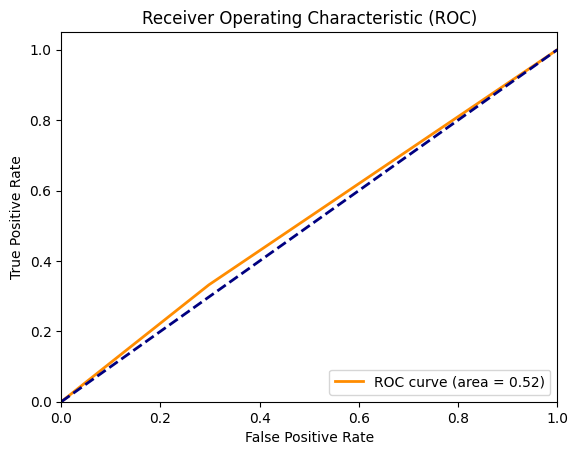

In [15]:
# Prepare dataset for modeling
X = data.drop(['HasDetections', 'CountryIdentifier'], axis=1)
y = data['HasDetections']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Decision Tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predict probabilities for ROC curve
y_pred = dt.predict(X_test)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [16]:
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

Precision: 0.5005405405405405
Recall: 0.3321377331420373
F1-score: 0.3993100474342389


In [17]:
# Using Grid Search to find the optimal hyperparameters

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Define the scoring metric
scorer = make_scorer(f1_score, average='binary')

# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, scoring=scorer, cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

best_dt = grid_search.best_estimator_
print(f"Best Decision Tree: {best_dt}")



Streaming output truncated to the last 5000 lines.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
TypeError: 'numpy.float64' object is not callable

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters wil

Best parameters: {'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Decision Tree: DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
TypeError: 'numpy.float64' object is not callable

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan

Precision: 0.51
Recall: 0.15
F1-score: 0.23


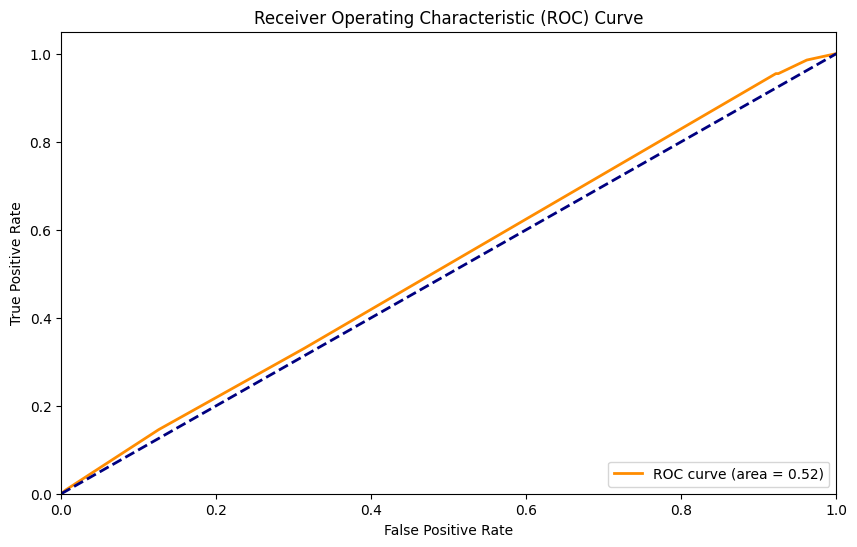

In [18]:
# Train the model with the best parameters
best_dt = grid_search.best_estimator_

# Predict on the test set
y_pred = best_dt.predict(X_test)

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1_score:.2f}")

# Compute ROC curve and ROC area
y_prob = best_dt.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [19]:
'''
Part2: unsupervised learning

Drop out the target variable
Apply K means clustering and plot the clusters
Find the optimal K parameter
Interpret the results
'''

'\nPart2: unsupervised learning\n\nDrop out the target variable\nApply K means clustering and plot the clusters\nFind the optimal K parameter\nInterpret the results\n'

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


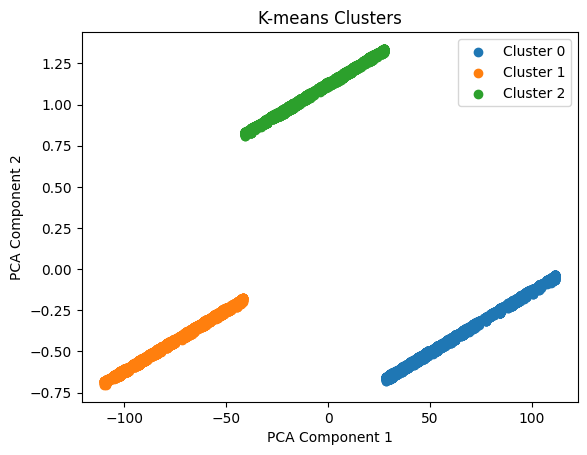

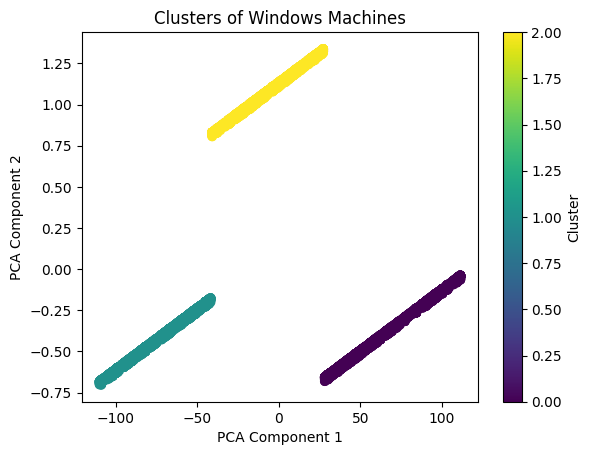

In [39]:
# Using Processed data from Part1

# Drop the target variable
X = df.drop(['HasDetections', 'Census_OSEdition', 'OsPlatformSubRelease'], axis=1)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the dataset
X['Cluster'] = clusters

# Plot the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure()
for cluster in range(3):
    plt.scatter(X_pca[clusters == cluster, 0], X_pca[clusters == cluster, 1], label=f'Cluster {cluster}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clusters')
plt.legend()
plt.show()

# Plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters of Windows Machines')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

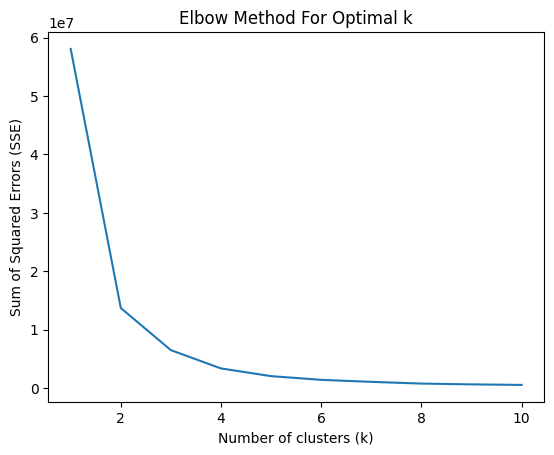

In [40]:
# Elbow method to find the optimal K
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the WCSS to visualize the Elbow
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method For Optimal k')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


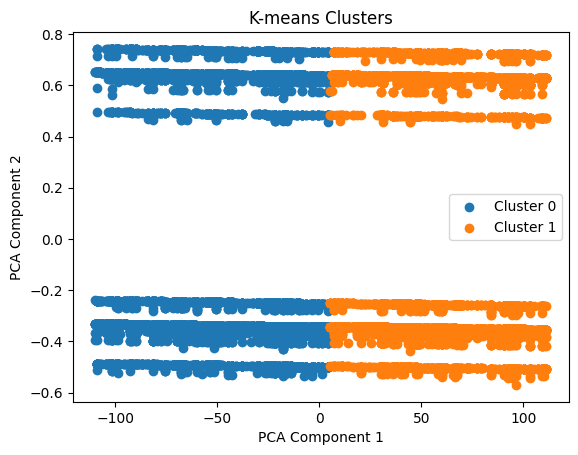

In [29]:
# Apply K-means clustering with the chosen k (example: k=4)
optimal_k = 2  # Set this to the optimal k found using the Elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the dataset
X['Cluster'] = clusters

# Plot the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure()
for cluster in range(optimal_k):
    plt.scatter(X_pca[clusters == cluster, 0], X_pca[clusters == cluster, 1], label=f'Cluster {cluster}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clusters')
plt.legend()
plt.show()

In [42]:
'''
# Analyze cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=data.columns[:-1])
print(cluster_centers_df)

# Check the size of each cluster
print(data['Cluster'].value_counts())
'''

"\n# Analyze cluster centers\ncluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)\ncluster_centers_df = pd.DataFrame(cluster_centers, columns=data.columns[:-1])\nprint(cluster_centers_df)\n\n# Check the size of each cluster\nprint(data['Cluster'].value_counts())\n"